# KNN para el dataset de IRIS

In [19]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap # For the colored decision regions

plt.rcParams['figure.figsize'] = [10, 6]
matplotlib.rc('xtick', labelsize = 20) 
matplotlib.rc('ytick', labelsize = 20) 
matplotlib.rcParams.update({'font.size': 22})

In [2]:
# Load and read the "IRIS" dataset (default from python)
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["Species"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Check the correspondance between the class number and the species it refers to

In [3]:
data.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Check how many possible flower types are there in the database

In [4]:
np.unique(df.iloc[:,4])

array([0, 1, 2])

As we can see the types of flowers are ordered. We use this to take only the first 100 entries to select two classes: "Iris-setosa" and "Iris-versicolor" 

In [5]:
# Select the two classes
y = df.iloc[0:100, 4].values  # values method of a pandas dataframe yields Numpy array
y = np.where(y == 0, -1, 1) # Setosa as (-1), versicolor as (+1)
dict_classes = {'-1': 'setosa', '1': 'versicolor'}

Select only 2 features to conduct a simple experiment: let us use the sepal length and petal length

In [6]:
# select two features: sepal length and petal length for visualization
X = df.iloc[0:100, [0,2]].values

Plot the training datapoints

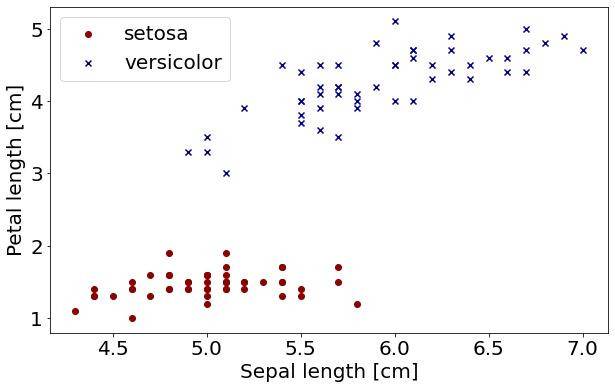

In [28]:
plt.scatter(X[:50, 0], X[:50, 1], color='darkred', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='darkblue', marker='x', label='versicolor')
plt.xlabel('Sepal length [cm]', fontsize = 20)
plt.ylabel('Petal length [cm]', fontsize = 20)
plt.legend(loc='upper left', fontsize = 20)
plt.show()

## Construct the KNN function

In [8]:
# Estimate the distances using different rules

def manhattan(a, b):
    return sum(abs(val1 - val2) for val1, val2 in zip(a,b))

def euclidean(a, b):
    return sum((val1 - val2)**2 for val1, val2 in zip(a,b))

def max_distance(a, b):
    return max(abs(val1 - val2) for val1, val2 in zip(a,b))

In [9]:
def knn_classifier(data, targets, test_point, k, def_distance = "eucl"):
    
    distances = []
    
    if def_distance == "eucl":
            for i in range(len(data)):
                distances.append(euclidean(data[i], test_point))
    if def_distance == "manh":
            for i in range(len(data)):
                distances.append(manhattan(data[i], test_point))
    if def_distance == "max":
            for i in range(len(data)):
                distances.append(max_distance(data[i], test_point))
    
    # Sort distances and targets simultaneously using the distances as references
    distances, targets = (list(t) for t in zip(*sorted(zip(distances, targets))))

    # Select label of the nearest k-neighbors
    k_labels = targets[:k]
    labels, counts = np.unique(k_labels, return_counts=True)
    
    return labels[np.argmax(counts)]
    

Ejemplo de uso:

In [10]:
knn_classifier(X, y, np.array([0,0]), k=1, def_distance = "eucl")

-1

In [20]:
def plot_decision_regions(data, targets, k, def_distance = "eucl", resolution = 0.1):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(targets))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        
    # use predict method to predict the class labels z of the grid points
    test_grid = np.array([xx1.ravel(),xx2.ravel()]).T
    n_test_points = test_grid.shape[0]
    Z = [knn_classifier(data, targets, test_grid[i,:], k = k, def_distance = def_distance) for i in np.arange(n_test_points)]
    Z = np.array(Z).reshape(xx2.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(targets)):
        lab = dict_classes[str(cl)]
        plt.scatter(x=data[y==cl, 0], y=data[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=lab)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.title(f'Distance: {def_distance}; k = {k}')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


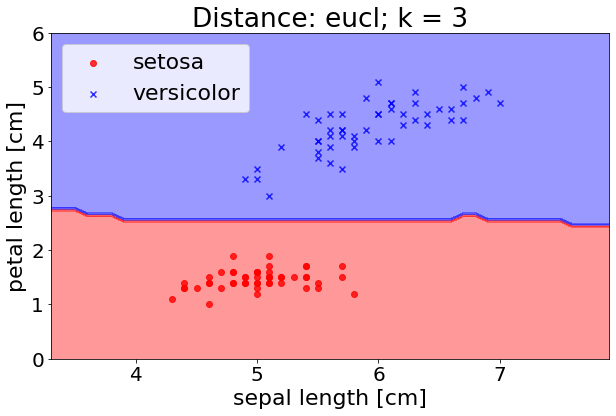

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


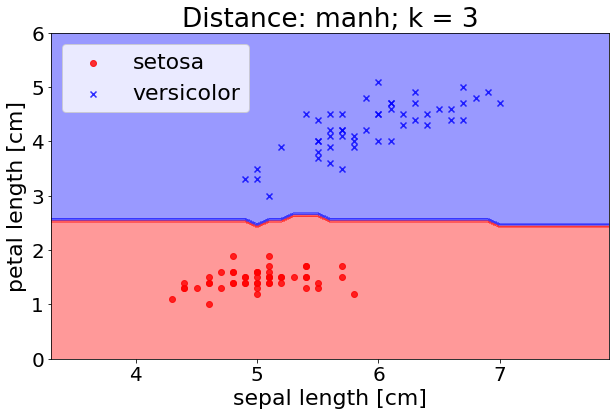

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


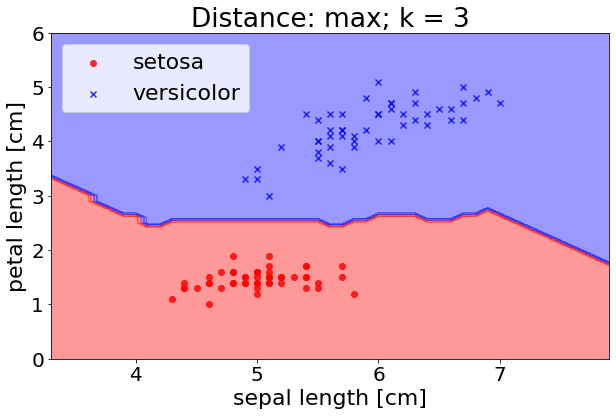

In [25]:
plot_decision_regions(X, y, k = 3, def_distance = "eucl")
plot_decision_regions(X, y, k = 3, def_distance = "manh")
plot_decision_regions(X, y, k = 3, def_distance = "max")

Es interesante ver qué ocurre en el límite de k = 50 (cuando consideramos todos los puntos de cada clase). En ese caso se estará teniendo en cuenta más bien la distancia al "centro de masas" de cada conjunto de puntos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


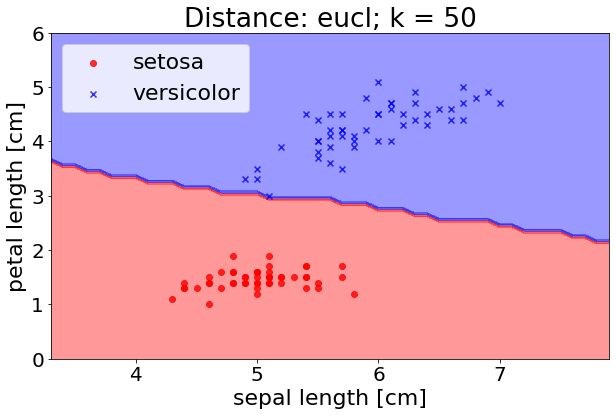

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


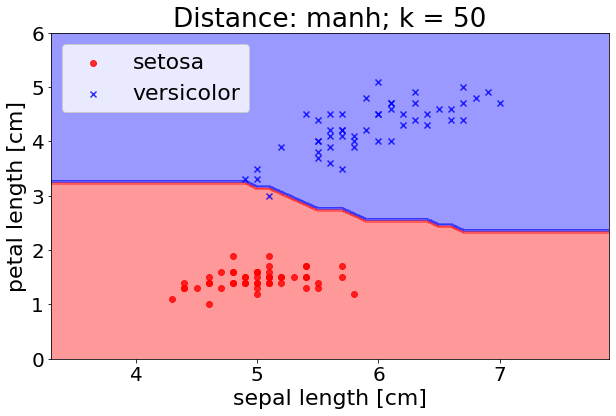

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


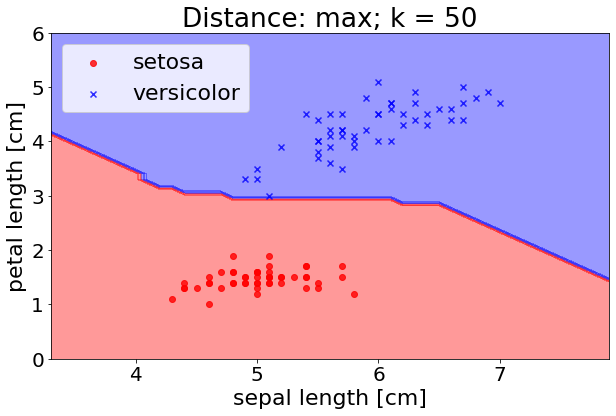

In [27]:
plot_decision_regions(X, y, k = 50, def_distance = "eucl")
plot_decision_regions(X, y, k = 50, def_distance = "manh")
plot_decision_regions(X, y, k = 50, def_distance = "max")